The idea of this task comes from the melody discrimination task that is used in the following paper:

https://www.sciencedirect.com/science/article/pii/S105381191300178X?via%3Dihub

Briefly, there are two signal classes:
1. The signal, here comprises of N sinosoidals of different frequencies.
2. The cue, a step function to specify when the network should produce the response.

After presenting the stimulus (first combination of signals) there will be a silence period in which the network should keep track of the signal (recall condition) or perform a transformation (working memory). After the pause a second signal will be presented and the network should decide if it is the same as the first or not (recall condition) or transformed properly (working memory). This example mirrors the second signal. There's a lot left to do!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from hardworking_memory import *

In [2]:
frange = (1, 20, 3) # range of frequencies (smallest, largest, step)
n_events = 3        # number of events within a trial.
t_events = 500      # duration of each event.
t_response = 500    # response time
t_delay = 500       # delay period between source and target stimuli
n_trials = 9        # number of trials within the experiment.

source_generator_kw = {"event_duration": t_events,"frequencies":None} 
target_generator_kw = source_generator_kw.copy()

tranformation_kw = {"frequency_range":frange}

trial_kw = {"source_generator":make_sin_stimulus,
            "source_generator_kw":source_generator_kw,
            "target_generator":make_sin_stimulus,
            "target_generator_kw":target_generator_kw,
            "t_response":t_response,
            "t_silence":t_delay,
            "global_noise":0.0}

Example of a Recall experiment:

Network should decide if the target is identical to the source or not. This means the network should hold on to the source during the delay period and compare it with the target afterwards.

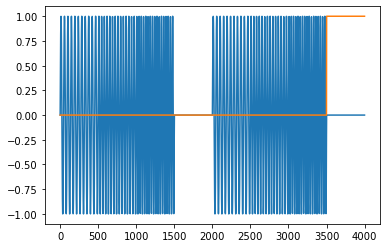

In [3]:
Recall_frequencies = template_generator(n_trials = n_trials,
                                        transformation = None, # recall means no transformation (if the correct label is match)
                                        retrograde = False)    # no retrograde either (if the correct label is match)

experiment = experiment_generator(frequency_mat = Recall_frequencies,
                         trial_generator = trial_generator,
                         trial_generator_kw = trial_kw ,
                         is_match=True, # here, they match
                         is_3d=True)

plt.plot(experiment[0,0,:])
plt.plot(experiment[2,0,:])
plt.show()

Example of a Working memory experiment:

Network should decide if the target is a transformed version of the source (not just identical as in Recall). This means the network should performs the transformation during the delay period and compares the signals afterwards.

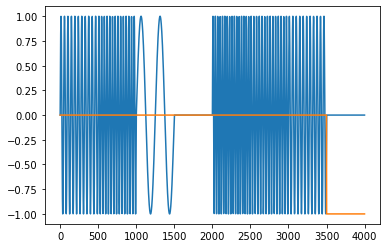

In [6]:
wm_frequencies = template_generator(n_trials = n_trials,
                                     transformation = scale_one_off, # a no_match scenario. if it was just retrograde then it would be match.
                                     retrograde = True,
                                     transformation_kw = tranformation_kw)

experiment = experiment_generator(frequency_mat = wm_frequencies,
                                  trial_generator = trial_generator,
                                  trial_generator_kw = trial_kw ,
                                  is_match=False, # they don't match
                                  is_3d=True)

plt.plot(experiment[0,0,:])
plt.plot(experiment[2,0,:])
plt.show()